In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb

import time

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12.8, 7.2)

In [2]:
df = pd.read_pickle('../data/df_24h.pkl')
df.head()

,location,time,energy,AirTemp,RelativeHumidity,Dni,energy_lag_1,energy_lag_2,energy_lag_3,energy_lag_4,...,energy_lag_39,energy_lag_40,energy_lag_41,energy_lag_42,energy_lag_43,energy_lag_44,energy_lag_45,energy_lag_46,energy_lag_47,energy_lag_48
48,## OLD Paulton Library Electricity Supply 1,2008-06-15 00:30:00+00:00,0.08,9.2,0.835,0.0,0.08,0.07,0.08,0.07,...,0.08,0.08,0.07,0.08,0.07,0.08,0.07,0.08,0.07,0.08
49,## OLD Paulton Library Electricity Supply 1,2008-06-15 01:00:00+00:00,0.07,8.8,0.846,0.0,0.08,0.08,0.07,0.08,...,0.08,0.08,0.08,0.07,0.08,0.07,0.08,0.07,0.08,0.07
50,## OLD Paulton Library Electricity Supply 1,2008-06-15 01:30:00+00:00,0.08,8.4,0.858,0.0,0.07,0.08,0.08,0.07,...,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.08,0.07,0.08
51,## OLD Paulton Library Electricity Supply 1,2008-06-15 02:00:00+00:00,0.07,8.1,0.870,0.0,0.08,0.07,0.08,0.08,...,0.07,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.08,0.07
52,## OLD Paulton Library Electricity Supply 1,2008-06-15 02:30:00+00:00,0.08,7.7,0.882,0.0,0.07,0.08,0.07,0.08,...,0.08,0.07,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.08


## 48 hours

### 80-20 split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['time', 'location', 'Dni', 'energy'], axis=1), df['energy'], test_size=0.2, random_state=42)

In [4]:
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, tree_method='gpu_hist')

In [5]:
init = time.time()
model.fit(X_train, y_train)
end = time.time()

print('Training time: {:.4f} s'.format(end - init))

Training time: 299.7333 s


In [6]:
init = time.time()
preds = model.predict(X_test)
end = time.time()

print('Prediction time: {:.4f} s'.format(end - init))

Prediction time: 11.2241 s


In [7]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
wmape = np.sum(np.abs(preds - y_test)) / np.sum(np.abs(y_test)) * 100
r2 = r2_score(y_test, preds)

print('MSE: {:.4f}'.format(mse))
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('WMAPE: {:.4f}'.format(wmape))
print('R2: {:.4f}'.format(r2))

MSE: 0.6643
RMSE: 0.8150
MAE: 0.3264
WMAPE: 8.0923
R2: 0.9907


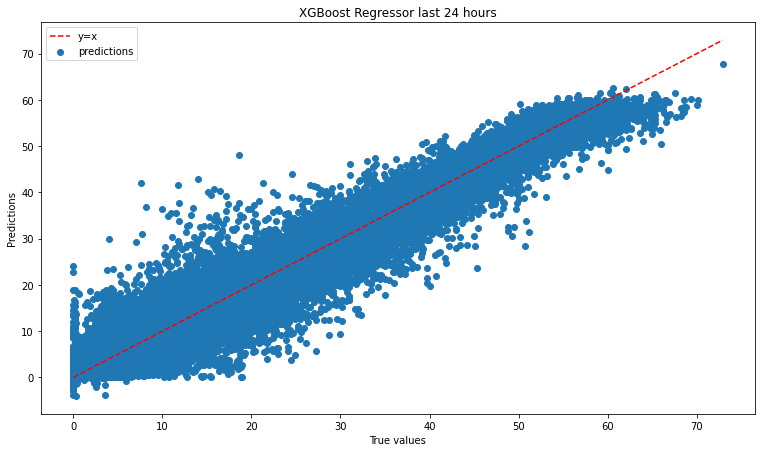

In [8]:
plt.scatter(y_test, preds)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.title('XGBoost Regressor last 24 hours')
plt.legend(['y=x', 'predictions'])
plt.show()

### 5 houses split

In [9]:
locations = ['St Saviours C of E Infant School',
       '##Northgate House Electricity Supply 2',
       'Swallow Street Stores & Workshop Electri',
       'Junior School Electricity - Kitchen',
       'Bath Central Library Electricity (HH)']

In [10]:
test = df[df['location'].isin(locations)]
train = df[~df['location'].isin(locations)]

X_train = train.drop(['time', 'location', 'Dni', 'energy'], axis=1)
y_train = train['energy']
X_test = test.drop(['time', 'location', 'Dni', 'energy'], axis=1)
y_test = test['energy']

In [11]:
test.shape[0] / train.shape[0] * 100

13.307495357605086

In [12]:
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, tree_method='gpu_hist')

In [13]:
init = time.time()
model.fit(X_train, y_train)
end = time.time()

print('Training time: {:.4f} s'.format(end - init))

Training time: 351.5962 s


In [14]:
init = time.time()
preds = model.predict(X_test)
end = time.time()

print('Prediction time: {:.4f} s'.format(end - init))

Prediction time: 5.4439 s


In [15]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
wmape = np.sum(np.abs(preds - y_test)) / np.sum(np.abs(y_test)) * 100
r2 = r2_score(y_test, preds)

print('MSE: {:.4f}'.format(mse))
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('WMAPE: {:.4f}'.format(wmape))
print('R2: {:.4f}'.format(r2))


MSE: 3.4365
RMSE: 1.8538
MAE: 0.6585
WMAPE: 10.6768
R2: 0.9729


## 0.5, 1, 5, 6, 12, 18 hours

In [19]:
def split(ddf, columns, test_size=0.2, houses=False):
    if not houses:
        X_train, X_test, y_train, y_test = train_test_split(ddf[columns], ddf['energy'], test_size=test_size, random_state=42)
    else:
        test = ddf[ddf['location'].isin(locations)]
        train = ddf[~ddf['location'].isin(locations)]
        X_train = train[columns]
        y_train = train['energy']
        X_test = test[columns]
        y_test = test['energy']
    return X_train, X_test, y_train, y_test

def performance(predictions, actuals, _print=True):
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    wmape = np.sum(np.abs(predictions - actuals)) / np.sum(np.abs(actuals)) * 100
    r2 = r2_score(actuals, predictions)
    if _print:
        print('MSE: {:.4f}'.format(mse))
        print('RMSE: {:.4f}'.format(rmse))
        print('MAE: {:.4f}'.format(mae))
        print('WMAPE: {:.4f}'.format(wmape))
        print('R2: {:.4f}'.format(r2))
    return mse, rmse, mae, wmape, r2

def plot(predictions, actuals, title):
    plt.scatter(actuals, predictions)
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.plot([0, max(actuals)], [0, max(actuals)], '--', color='red')
    plt.title(title)
    plt.legend(['y=x', 'predictions'])
    plt.show()

Last 0.5 hours + AirTemp + RelHum (80-20)
Training time: 72.4225 s
Prediction time: 8.0902 s
MSE: 1.2767
RMSE: 1.1299
MAE: 0.3892
WMAPE: 9.6500
R2: 0.9821


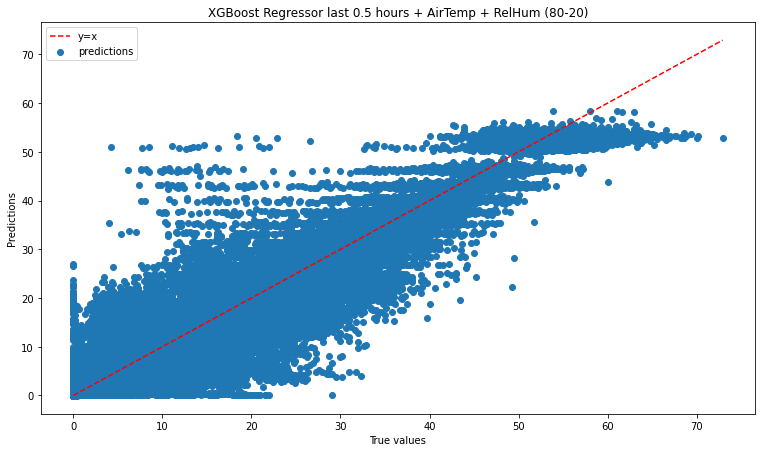

Last 0.5 hours + AirTemp + RelHum (houses)


MemoryError: Unable to allocate 2.64 GiB for an array with shape (52, 6824064) and data type float64

In [20]:
for i in [1, 2, 10, 12, 24, 36]:
    cols = ['AirTemp', 'RelativeHumidity'] + [f"energy_lag_{j}" for j in range(1, i + 1)]
    
    print("Last {} hour{} + AirTemp + RelHum (80-20)".format(i / 2, 's' if i / 2 != 1 else ''))

    X_train, X_test, y_train, y_test = split(df, cols, test_size=0.2, houses=False)

    model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, tree_method='gpu_hist')
    init = time.time()
    model = model.fit(X_train, y_train)
    end = time.time()

    print('Training time: {:.4f} s'.format(end - init))

    init = time.time()
    preds = model.predict(X_test)
    end = time.time()

    print('Prediction time: {:.4f} s'.format(end - init))

    performance(preds, y_test)

    plot(preds, y_test, 'XGBoost Regressor last {} hour{} + AirTemp + RelHum (80-20)'.format(i / 2, 's' if i / 2 != 1.0 else ''))
    
    # free GPU memory
    del model
    
    # ------------------------------------------------------------------------------- #

    print("Last {} hour{} + AirTemp + RelHum (houses)".format(i / 2, 's' if i / 2 != 1 else ''))
    
    X_train, X_test, y_train, y_test = split(df, cols, test_size=0.2, houses=True)

    model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, tree_method='gpu_hist')
    init = time.time()
    model = model.fit(X_train, y_train)
    end = time.time()

    print('Training time: {:.4f} s'.format(end - init))

    init = time.time()
    preds = model.predict(X_test)
    end = time.time()

    print('Prediction time: {:.4f} s'.format(end - init))

    performance(preds, y_test)

    plot(preds, y_test, 'XGBoost Regressor last {} hour{} + AirTemp + RelHum (houses)'.format(i / 2, 's' if i / 2 != 1.0 else ''))

    # free GPU memory
    del model

In [34]:
del test, train
test = df[df['location'].isin(locations)]
train = df.drop(test.index)
test.shape, train.shape